In [ ]:
# %pip install ipympl
%pip install -U -e /Users/oscar/LB/imageviewer

Obtaining file:///Users/oscar/LB/imageviewer
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for imageviewer (pyproject.toml) ... done
  Created wheel for imageviewer: filename=imageviewer-0.5.11-0.editable-py3-none-any.whl size=4364 sha256=a655f2f45ff11449a96f4becca22925fc2a3b9b89c2f6105597f7aa5ddbce728
  Stored in directory: /private/var/folders/lp/gmwtz0k15l9131lfg2fd97bh0000gn/T/pip-ephem-wheel-cache-ib5lczj5/wheels/cf/ba/3a/80024520cc37b5667fe141f5b01a7e47b97286124514acadcc
Successfully built imageviewer
  Attempting uninstall: imageviewer
    Found existing installation: imageviewer 0.5.10
    Uninstalling imageviewer-0.5.10:
      Successfully uninstalled imageviewer-0.5.10

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need 

In [1]:
%matplotlib widget
import imageviewer as imgvw
import pandas as pd
print(imgvw.__version__)

0.5.11


In [2]:
path = "/Users/oscar/LB/grav_lens/Proposals/"

iv = imgvw.image_viewer(directory=path,
                        folder_list=['236'])

Current working directory: /Users/oscar/LB/imageviewer/examples
Image directory defined: /Users/oscar/LB/grav_lens/Proposals/
Total number of images found:  30


Removing sky background...
- Sky background mean: 134.12685; Sky background std: 18.642088
FWHM used for source detection: 11.4669700385283 pixels
Click on the image to add sources. Close the image when done.


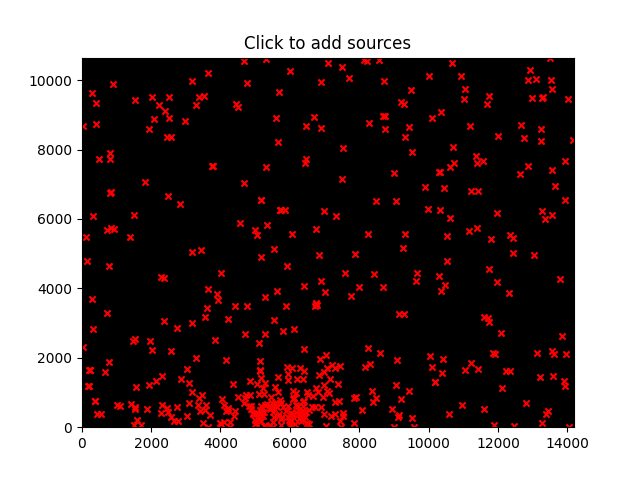

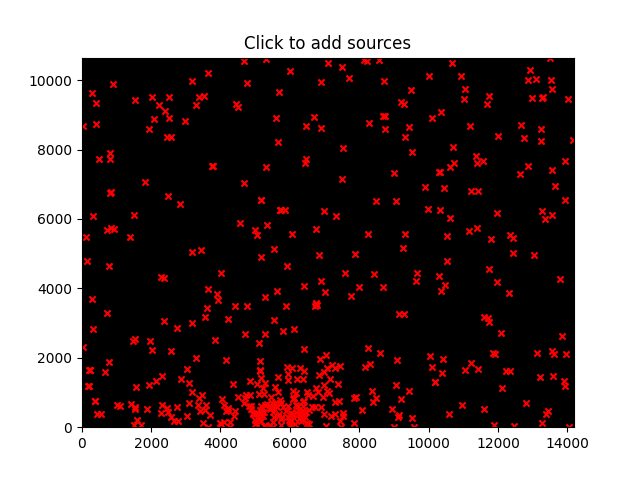

KeyboardInterrupt: 

In [4]:
i_table = pd.read_pickle('./test_table.pkl')
table, coords = imgvw.detect_sources(iv.df_files['path'].iloc[-1], plot=True,
                                sky_threshold = 8,
                                add_sources=True,
                                method = 'find_peaks',
                                init_table=i_table,
                                )

In [16]:
table.to_pandas().to_pickle('./test_table.pkl')


------
Viewing image:
236/TTT1_QHY411-1_2025-12-03-05-33-00-049762_ZTF25acegldq_SDSSi.fits
    Object:  ZTF25acegldq   -  Filter:  SDSSi


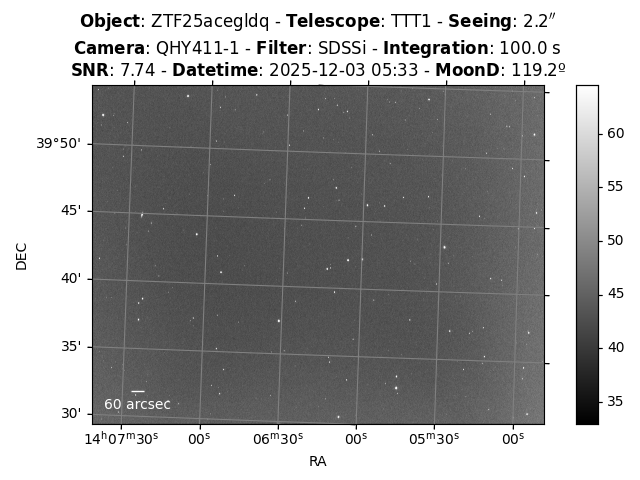

In [8]:
# iv.header_info(-1, iloc=True, interesting_keys='all', )

iv.view_image(23, iloc=True,
              manipulation_kw={
                  'rotate': False,
                  'percentile': (10, 99),
                  #'zoom': '0 10 0d',
              },
              plotting_kw={
                  'scalebar_arcsec': 60,
                  })

In [2]:


iv.dataframe_add(['seeing', 'moon', 'integration', 'ZP', 'EZP'])
iv.df_files


Current working directory: /Users/oscar/LB/imageviewer/examples
Image directory defined: /Users/oscar/LB/grav_lens/Proposals/
Total number of images found:  30


,filename,path,telescope,camera,object,filter,size_MB,date_time,date,folder_found,im_type,seeing,moon,integration,EZP,ZP
0,TTT1_QHY411-1_2025-11-29-05-40-55-643038_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSg,604.93248,2025-11-29 05:40:55.643038,2025-11-28,236,LB,NaN,NaN,60.0,NaN,NaN
1,TTT1_QHY411-1_2025-11-29-05-40-57-652650_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSr,604.94112,2025-11-29 05:40:57.652650,2025-11-28,236,LB,5.554071,127.894620,80.0,0.0033,23.4933
2,TTT1_QHY411-1_2025-11-29-05-43-00-215530_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSi,604.94112,2025-11-29 05:43:00.215530,2025-11-28,236,LB,6.224602,127.903029,100.0,0.0207,22.5332
3,TTT1_QHY411-1_2025-11-29-05-45-35-184267_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSg,604.93824,2025-11-29 05:45:35.184267,2025-11-28,236,LB,4.221262,127.913492,60.0,0.0045,24.1449
4,TTT1_QHY411-1_2025-11-29-05-47-37-771080_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSr,604.93248,2025-11-29 05:47:37.771080,2025-11-28,236,LB,NaN,NaN,83.0,NaN,NaN
5,TTT1_QHY411-1_2025-11-29-05-49-44-976381_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSi,604.93248,2025-11-29 05:49:44.976381,2025-11-28,236,LB,NaN,NaN,100.0,NaN,NaN
6,TTT1_QHY411-1_2025-12-01-05-28-44-269568_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSg,604.93248,2025-12-01 05:28:44.269568,2025-11-30,236,LB,NaN,NaN,60.0,NaN,NaN
7,TTT1_QHY411-1_2025-12-01-05-29-47-336276_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSr,604.93248,2025-12-01 05:29:47.336276,2025-11-30,236,LB,NaN,NaN,80.0,NaN,NaN
8,TTT1_QHY411-1_2025-12-01-05-31-10-432016_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSi,604.93248,2025-12-01 05:31:10.432016,2025-11-30,236,LB,NaN,NaN,100.0,NaN,NaN
9,TTT1_QHY411-1_2025-12-01-05-32-55-895285_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSg,604.93248,2025-12-01 05:32:55.895285,2025-11-30,236,LB,NaN,NaN,60.0,NaN,NaN


In [10]:
imgvw.filter_df(iv.df_files, 
                filters_dict={'seeing': (0.5, 5.0), 'moon': (60, 180), 'integration': (30, 300)})

Filtering dataset with:
 - 0.5 < seeing < 5.0
 - 60 < moon < 180
 - 30 < integration < 300
Number of files before filtering: 30
Number of files after filtering: 13


,filename,path,telescope,camera,object,filter,size_MB,date_time,date,folder_found,im_type,seeing,moon,integration,EZP,ZP
3,TTT1_QHY411-1_2025-11-29-05-45-35-184267_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSg,604.93824,2025-11-29 05:45:35.184267,2025-11-28,236,LB,4.221262,127.913492,60.0,0.0045,24.1449
12,TTT1_QHY411-1_2025-12-02-05-32-27-005042_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSg,604.93824,2025-12-02 05:32:27.005042,2025-12-01,236,LB,4.349806,125.350674,60.0,0.0049,24.1675
13,TTT1_QHY411-1_2025-12-02-05-35-56-055886_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSr,604.94112,2025-12-02 05:35:56.055886,2025-12-01,236,LB,3.165129,125.341985,80.0,0.0044,23.5185
14,TTT1_QHY411-1_2025-12-02-05-38-52-889776_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSi,604.94112,2025-12-02 05:38:52.889776,2025-12-01,236,LB,4.207248,125.334374,100.0,0.0123,22.4981
15,TTT1_QHY411-1_2025-12-02-05-43-57-213276_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSg,604.93824,2025-12-02 05:43:57.213276,2025-12-01,236,LB,2.470966,125.321132,60.0,0.0048,24.1841
16,TTT1_QHY411-1_2025-12-02-05-47-10-137034_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSr,604.94112,2025-12-02 05:47:10.137034,2025-12-01,236,LB,2.862431,125.312579,83.0,0.0054,23.5343
17,TTT1_QHY411-1_2025-12-02-05-50-00-509705_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSi,604.94112,2025-12-02 05:50:00.509705,2025-12-01,236,LB,4.096182,125.304994,100.0,0.0239,22.5416
18,TTT1_QHY411-1_2025-12-03-05-26-19-284187_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSg,604.93824,2025-12-03 05:26:19.284187,2025-12-02,236,LB,2.788208,119.216590,60.0,0.0027,24.1532
19,TTT1_QHY411-1_2025-12-03-05-27-22-320308_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSr,604.94112,2025-12-03 05:27:22.320308,2025-12-02,236,LB,2.478519,119.212545,80.0,0.0093,23.5284
20,TTT1_QHY411-1_2025-12-03-05-28-45-420126_ZTF25...,/Users/oscar/LB/grav_lens/Proposals/236/TTT1_Q...,TTT1,QHY411-1,ZTF25acegldq,SDSSi,604.94112,2025-12-03 05:28:45.420126,2025-12-02,236,LB,3.040722,119.207278,100.0,0.0213,22.5413
